<div style="padding: 10px; color: white; margin: 0; font-size: 200%; text-align: center; display: fill; border-radius: 20px; background-color: #4285F4; overflow: hidden; font-weight: 800">🚲Google BikeShare Capstone: Exploratory Data Analysis🚲</div>


# 1 | Discovering and Joining our Data

This is the first practice of EDA. During this practice, we familiarize themselves with the data so we can start conceptualizing how to use it. We review the data and ask questions about it. In this part, I also made sure that each columns and datatypes are consistent before Joining them, joining is the phase where we combine data. 

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import missingno as msno

In [2]:
#Loop through the whole folder and confirm if columns are the same before concatonating them

def check_columns_equal(df1, df2):
    return df1.columns.equals(df2.columns)

folder_path = './2022 tripdata/'
dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

first_df = dataframes[0]
columns_equal = all(check_columns_equal(first_df, df) for df in dataframes)

if columns_equal:
    print("All CSV files have the same columns.")
else:
    print("CSV files have different columns.")

All CSV files have the same columns.


In [3]:
#check for same datatypes

def check_data_types_equal(df1, df2):
    return df1.dtypes.equals(df2.dtypes)

folder_path = './2022 tripdata/'
dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

first_df = dataframes[0]
data_types_equal = all(check_data_types_equal(first_df, df) for df in dataframes)

if data_types_equal:
    print("All CSV files have the same data types for columns.")
else:
    print("CSV files have different data types for columns.")


All CSV files have the same data types for columns.


In [4]:
#merging all 12 csv files of 2022 trip data

folder_path = './2022 tripdata/'
dataframes = []

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

In [5]:
combined_df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
5,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.895634,-87.672069,41.903119,-87.673935,member
6,BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.954341,-87.686080,41.952833,-87.649993,member
7,81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.925602,-87.653708,41.931931,-87.677856,member
8,154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.861251,-87.656500,41.883380,-87.641170,member
9,72DC25B2DD467EEF,classic_bike,2022-01-28 15:27:53,2022-01-28 15:35:16,LaSalle St & Jackson Blvd,TA1309000004,Clinton St & Washington Blvd,WL-012,41.878166,-87.631929,41.883380,-87.641170,member


In [6]:
combined_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [7]:
print("Column and Rows:", combined_df.shape)
print("Total size:", combined_df.size)

Column and Rows: (5667717, 13)
Total size: 73680321


In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [9]:
combined_df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


<div style="padding: 10px; color: white; margin: 0; font-size: 200%; text-align: center; display: fill; border-radius: 20px; background-color: #DB4437; overflow: hidden; font-weight: 800">2 | Cleaning🧹</div>


# 2 | Cleaning 

**Based on our info() method we need to check for the following:**

- The `started at` and `ended_at` columns need to be converted into datetime.
- Null values
- Duplicated values 

**Other Observations**
- For our analysis, `ride_id` and `station ids` column can be dropped as it doesn't really have any impact in our analysis in identifying trends of casual/annual members riders.
- The `start` and `end` station ID columns seems to be very inconsistent. This may need to be further checked or maybe dropped later as other columnns provide the same information on the location of how a ride started and ended

In [10]:
#making a copy of combined dataframe before cleaning

file_path = 'total_2022_tripdata.csv'
df.to_csv(file_path, index=False)

In [11]:
#Converting `started at` and `ended_at` columns to datetime
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'])

#checking if it reflected
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 562.1+ MB


In [12]:
#check for duplicates
combined_df.duplicated().any()

False

In [13]:
#check for null values
combined_df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

<Axes: >

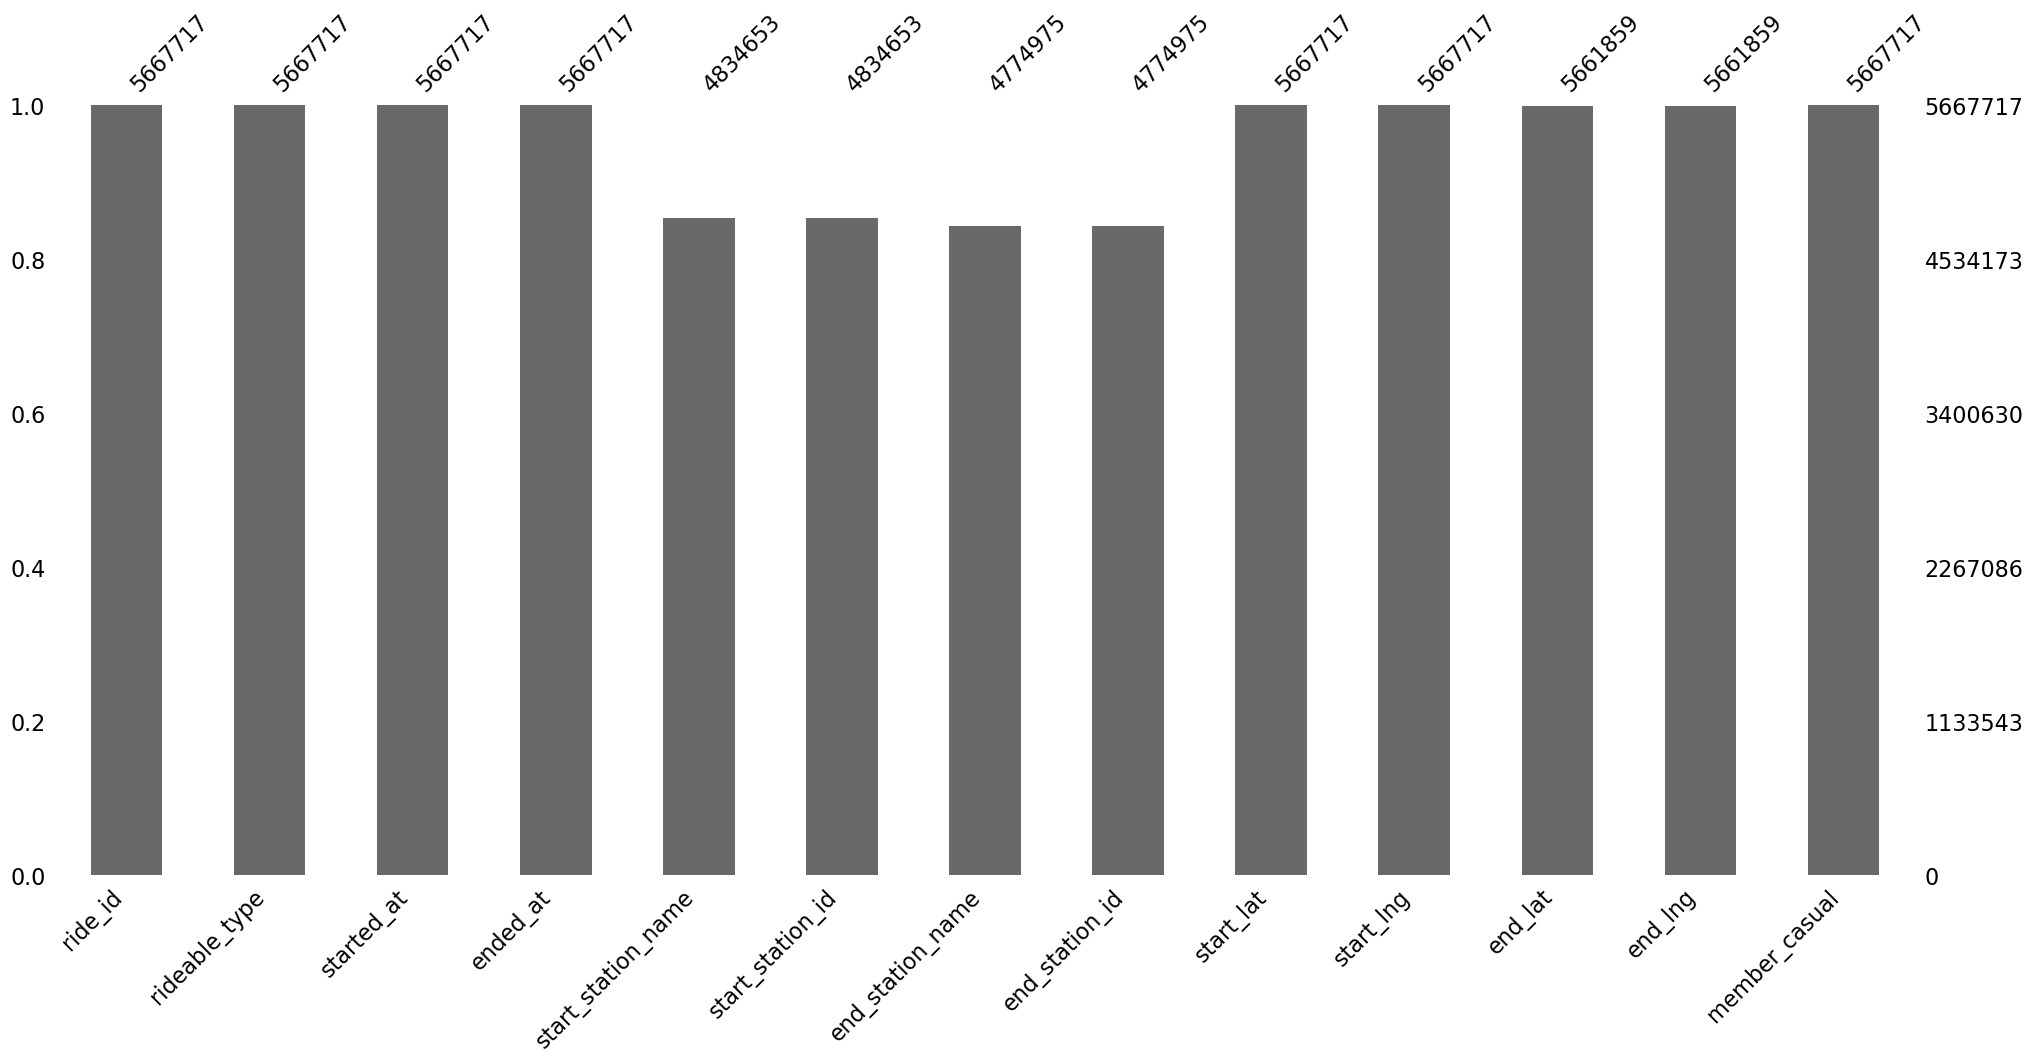

In [14]:
#using missingno package to visualize how much data is missing accross our dataset
msno.bar(combined_df)

In [15]:
#Checking the number of missing values across the whole dataset
missing_percentage = (combined_df.isnull().sum() / len(combined_df)) * 100
print(missing_percentage)


ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.698405
start_station_id      14.698405
end_station_name      15.751351
end_station_id        15.751351
start_lat              0.000000
start_lng              0.000000
end_lat                0.103357
end_lng                0.103357
member_casual          0.000000
dtype: float64


We have at most 15% of missing data across our `starting` and `end` station names and ID column.  In the context of our analysis, we have decided to drop the station ID column from consideration due to inconsistencies in its contents. Instead, we will focus on utilizing the station names, as they provide a more informative and coherent representation of each station. 

For the missing values at `station names` column, we will be dropping the null values. 

As for the `end_lat` and `end_long` columns with missing data, we will be dropping their rows as they only account of 0.10% missing data which does not hugely affect our analysis.

In [16]:
# Drop rows with missing data in 'end_lat' and 'end_lng' columns
combined_df.dropna(subset=['end_lat', 'end_lng'], inplace=True)
combined_df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat               False
end_lng               False
member_casual         False
dtype: bool

In [17]:
#dropping null values of station names
combined_df.dropna(subset=['start_station_name', 'end_station_name'], inplace=True)
combined_df.isnull().any()


ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name    False
start_station_id      False
end_station_name      False
end_station_id        False
start_lat             False
start_lng             False
end_lat               False
end_lng               False
member_casual         False
dtype: bool

<div style="padding: 10px; color: white; margin: 0; font-size: 200%; text-align: center; display: fill; border-radius: 20px; background-color: #F4B400; overflow: hidden; font-weight: 800">3 | Structuring and Validating🧩</div>


# 3 | Structuring

 In this phase we transform our data to it to be more easily visualized, explained, or modeled. In our case, we will make our data more suitable for later visualization. For this step, we will be dropping our `ride_id` column as it is not needed for our analysis. We will also be creating a new column which is `ride_duration` which is the total number of hours a ride was completed, by subtracting our `started_at` and `ended_at` times column. We might also need specific `hour/time`, `day`, `month` and `trip_distance` for our analysis.

In [18]:
#dropping station start station id and end station id
combined_df.drop(['start_station_id', 'end_station_id'], axis=1, inplace=True)
combined_df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member


In [19]:
#dropping ride_id
combined_df.drop(['ride_id'], axis=1, inplace=True)
combined_df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member


In [20]:
#Creating ride_duration
combined_df["ride_duration"] = combined_df["ended_at"] - combined_df["started_at"]
combined_df["ride_duration"] = pd.to_numeric(combined_df["ride_duration"])/6e+10 
combined_df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member,4.350000
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member,6.033333


In [21]:
#Creating hour a ride started
combined_df['hour_started'] = combined_df['started_at'].dt.hour
combined_df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,hour_started
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,11
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,8
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,4
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,0
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,1


In [22]:
#Creating day the ride started 
combined_df["ride_day"] = combined_df["started_at"].dt.dayofweek
day_dict = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
combined_df["ride_day"]= combined_df["ride_day"].apply(lambda y:day_dict[y])
combined_df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,hour_started,ride_day
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,11,Wednesday
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,8,Sunday
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,4,Monday
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,0,Monday
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,1,Wednesday


In [23]:
#Creating month ride started
combined_df['month_started'] = combined_df['started_at'].dt.month 
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: 
            "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
combined_df["month_started"]= combined_df["month_started"].apply(lambda y:month_dict[y])
combined_df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,hour_started,ride_day,month_started
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,11,Wednesday,January
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,8,Sunday,January
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,4,Monday,January
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,0,Monday,January
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,1,Wednesday,January


In [24]:
#Creating trip distance using distance formula 
combined_df["trip_distance"] = np.sqrt(((combined_df["end_lat"] - combined_df["start_lat"])**2) + ((combined_df["end_lng"] - combined_df["start_lng"])**2))
combined_df["trip_distance"] = combined_df["trip_distance"] * 111.139
combined_df.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,hour_started,ride_day,month_started,trip_distance
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,11,Wednesday,January,0.940739
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,8,Sunday,January,0.933797
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,4,Monday,January,1.344228
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,0,Monday,January,2.467130
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,1,Wednesday,January,0.860460


In [25]:
#renaming member_casual to user_type
combined_df.rename(columns={'member_casual': 'user_type'}, inplace=True)
combined_df.head()


,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,user_type,ride_duration,hour_started,ride_day,month_started,trip_distance
0,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012800,-87.665906,42.012560,-87.674367,casual,2.950000,11,Wednesday,January,0.940739
1,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,Clark St & Touhy Ave,42.012763,-87.665967,42.012560,-87.674367,casual,4.350000,8,Sunday,January,0.933797
2,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,Greenview Ave & Fullerton Ave,41.925602,-87.653708,41.925330,-87.665800,member,4.350000,4,Monday,January,1.344228
3,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,Paulina St & Montrose Ave,41.983593,-87.669154,41.961507,-87.671387,casual,14.933333,0,Monday,January,2.467130
4,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,State St & Randolph St,41.877850,-87.624080,41.884621,-87.627834,member,6.033333,1,Wednesday,January,0.860460


# 3.1 Validating 

In this step we simply validate and recheck our columns and datatypes are consistent and of quality before we proceed with visualizations or modeling. 

In [26]:
#rechecking data types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4369360 entries, 0 to 5667716
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   rideable_type       object        
 1   started_at          datetime64[ns]
 2   ended_at            datetime64[ns]
 3   start_station_name  object        
 4   end_station_name    object        
 5   start_lat           float64       
 6   start_lng           float64       
 7   end_lat             float64       
 8   end_lng             float64       
 9   user_type           object        
 10  ride_duration       float64       
 11  hour_started        int32         
 12  ride_day            object        
 13  month_started       object        
 14  trip_distance       float64       
dtypes: datetime64[ns](2), float64(6), int32(1), object(6)
memory usage: 516.7+ MB


In [27]:
##check null values
combined_df.isnull().any()

rideable_type         False
started_at            False
ended_at              False
start_station_name    False
end_station_name      False
start_lat             False
start_lng             False
end_lat               False
end_lng               False
user_type             False
ride_duration         False
hour_started          False
ride_day              False
month_started         False
trip_distance         False
dtype: bool

In [28]:
combined_df.duplicated().any().sum()

1

In [29]:
combined_df.drop_duplicates(keep = False, inplace=True )
combined_df.duplicated().any()

False

In [30]:
#Checking for outliers in trip_duration
combined_df["ride_duration"].describe(include = "all")

count    4.369316e+06
mean     1.709514e+01
std      4.786755e+01
min     -1.687000e+02
25%      6.050000e+00
50%      1.060000e+01
75%      1.901667e+01
max      3.435407e+04
Name: ride_duration, dtype: float64

Almost 4 hours seems to be some excessive riding time for our riders seen at the maximum ride duration, and there are some negative values at our minimum ride duration. The ride duration needs to have outliers checked and cleaned. 

In [31]:
# removing outliers for trips less than 1 second and those that are longer than 15 minutes 
outliers_trip_duration = (combined_df["ride_duration"] < 1) | (combined_df["ride_duration"] > 900)
combined_df.drop(combined_df.index[outliers_trip_duration], inplace = True)

In [32]:
combined_df["ride_duration"].describe(include = "all")

count    4.291399e+06
mean     1.698340e+01
std      2.526436e+01
min      1.000000e+00
25%      6.250000e+00
50%      1.080000e+01
75%      1.923333e+01
max      8.999667e+02
Name: ride_duration, dtype: float64

In [33]:
#Making a copy of our final dataframe

file_path = 'Cleaned_2022_tripdata.csv'
combined_df.to_csv(file_path, index=False)

<div style="padding: 10px; color: white; margin: 0; font-size: 200%; text-align: center; display: fill; border-radius: 20px; background-color: #0F9D58; overflow: hidden; font-weight: 800">4 | Presenting Visualizations</div>


# 4 | Presenting Visualizations

In this case study, we are assigned to differentiate annual members and casual riders of Cyclistic in order to understand from the data how we can convert casual riders to annual members. This will be our guide in our visuals.

- How do annual members and casual riders use Cyclistic bikes differently?
- Why would casual riders buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual riders to become members?

**Possible visuals**

PieChart/BarCharts 
- Member vs Casual
- Type of Bike
- Popular Station Names  

Data Distribution (probably tableau as my IDE having hard time processing 5 million rows)/ or I can aggregate the data into smaller sections

- Histograms/Boxplot on ride duration

Maps (Tableau)
- geolocations of trips
- heatmap of trips 
- popular routes?

Correlations
- User Type vs. Casual Ride Duration
- User Type vs type of bike 

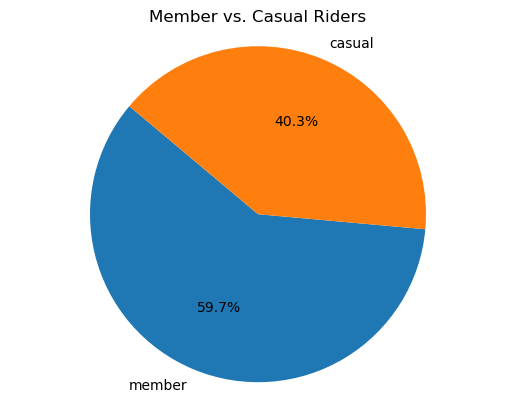

In [34]:
#Members vs Casual Riders in 2022

counts = combined_df['user_type'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Member vs. Casual Riders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

There seems to be more riders that are members compared to riders that are just casual users of Bikeshare. 

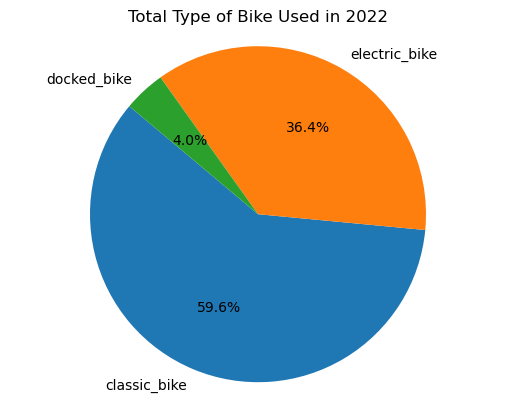

In [41]:
#Most used Type of Bike in 2022

counts = combined_df['rideable_type'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Type of Bike Used in 2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

There seems to be balanced use of either classic bikes or electric bike, while docked bikes has the most fewest users. Users of the Bikeshare company probably want the flexibility of dropping the bikes anywhere instead of riding it to an assigned station.

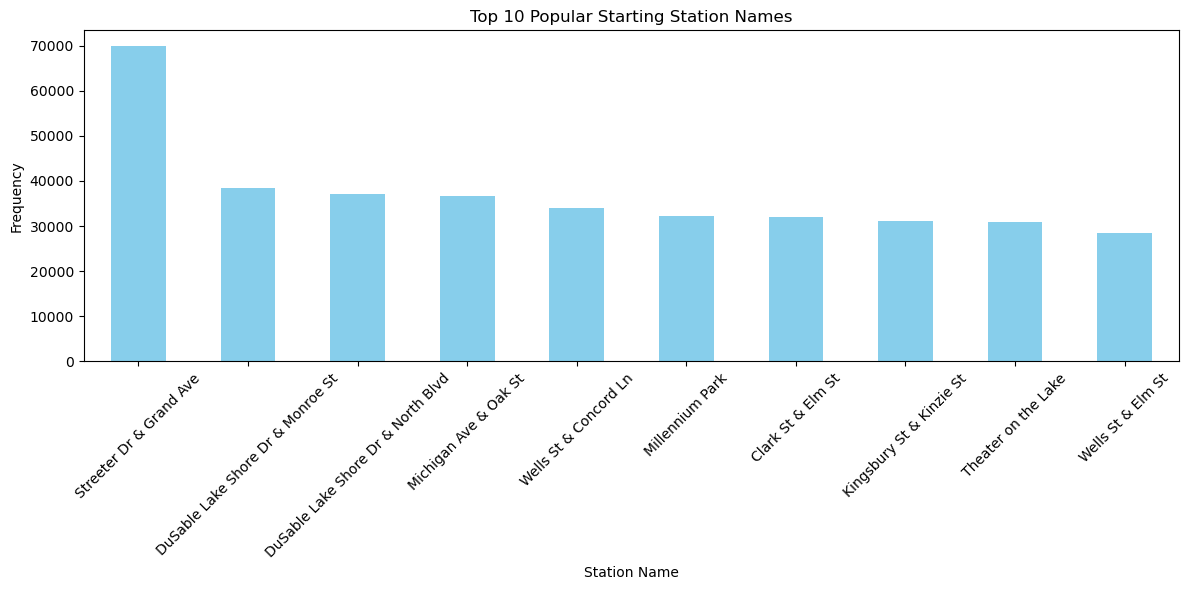

In [36]:
# Count the occurrences of each station name
station_counts = filtered_df['start_station_name'].value_counts()

# Select the top N popular stations to plot
top_n = 10
top_n_stations = station_counts.head(top_n)

plt.figure(figsize=(12, 6))
top_n_stations.plot(kind='bar', color='skyblue')
plt.xlabel('Station Name')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Popular Starting Station Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The most popular Starting Station is `Streeter Drive and Grand Ave`. This is followed by `DuSable Lake Shore Drive and Monroe Street` and `North Blvd`, `Michigan Ave and Oak Street`.

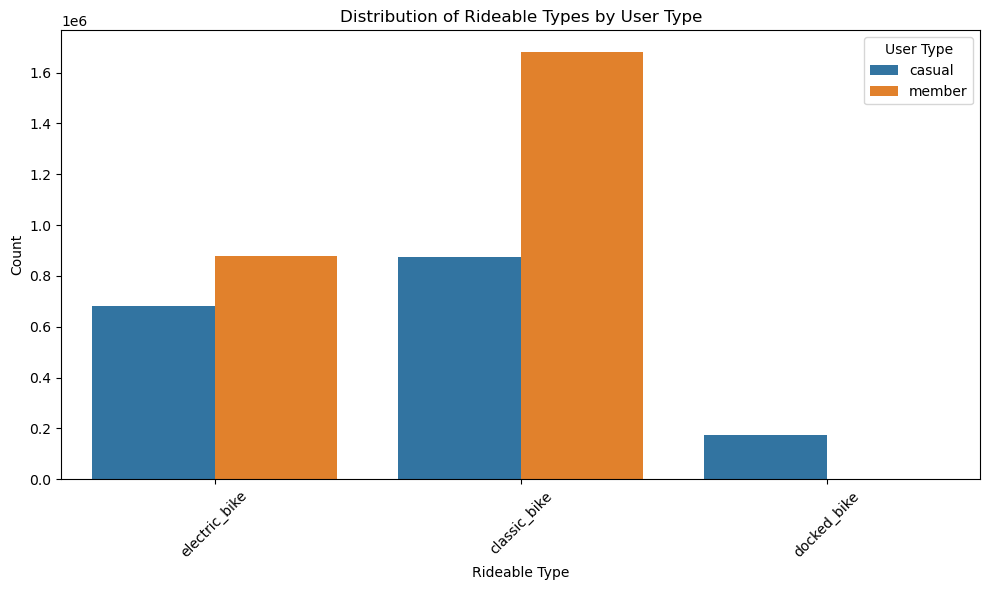

In [42]:
#Distribution of Rideable Types by User Type
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='rideable_type', hue='user_type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.title('Distribution of Rideable Types by User Type')
plt.xticks(rotation=45) 


plt.legend(title='User Type')
plt.tight_layout()
plt.show()

From this barchart we can see that, docked bikes are only being used by our casual riders. Meanwhile members go with either electric and classic bikes.The chart also indicates of the preference of member riders to take classic bikes more than electric bikes, perhaps this because of the instances that not all electric bikes are available for use, some are charging? While classic bikes are ready to go anytime.  

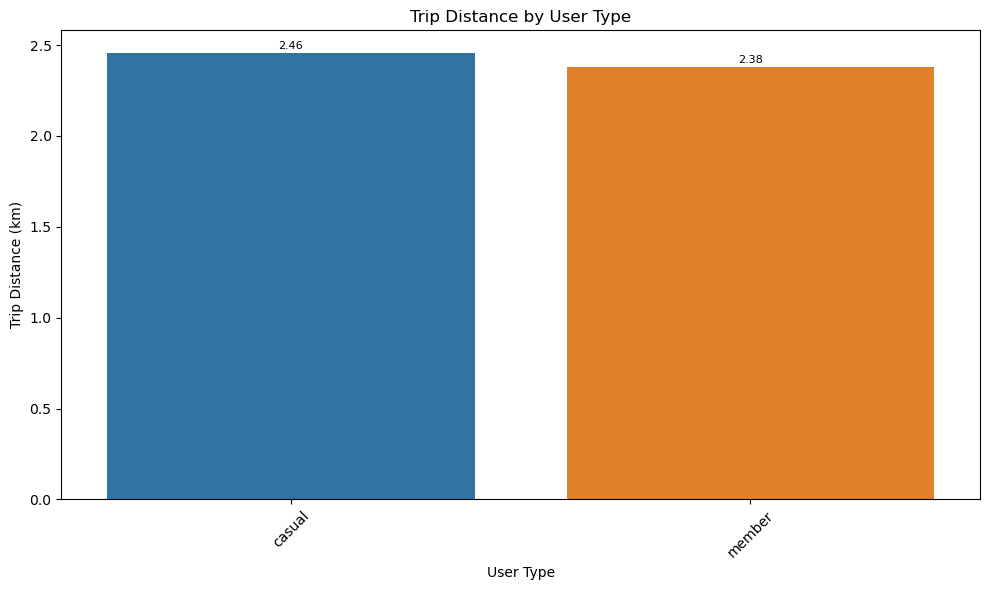

In [46]:
#Trip distance by User Type
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined_df, x='user_type', y='trip_distance', errorbar=None, capsize=0.2)
plt.xlabel('User Type')
plt.ylabel('Trip Distance (km)')
plt.title('Trip Distance by User Type')
plt.xticks(rotation=45)

# add data points
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

Both user types do not seem to vary greatly between their trip distances.

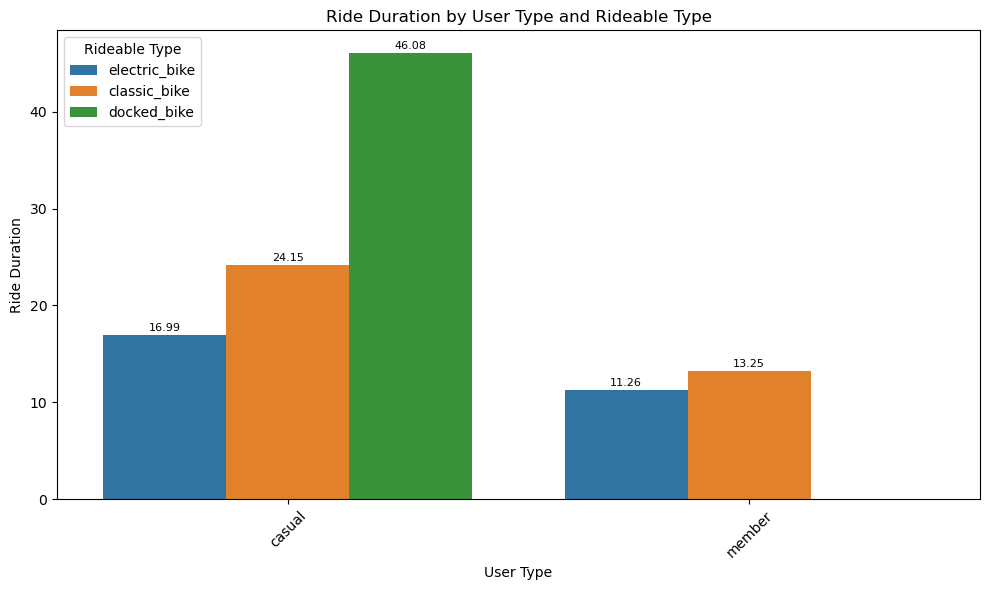

In [49]:
#Member vs Casual Rider in Trip Duration
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined_df, x='user_type', y='ride_duration', hue='rideable_type', errorbar=None, capsize=0.2)
plt.xlabel('User Type')
plt.ylabel('Ride Duration')
plt.title('Ride Duration by User Type and Rideable Type')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

plt.legend(title='Rideable Type')
plt.tight_layout()
plt.show()


Docked bicycles have exhibited a great preference among our casual riders for greater trip durations. Meanwhile, our members primarily opt for electric and classic bicycles only and use them mostly for shorter distances. This data provides us with valuable insights into the distinct preferences of our user_types. To further explore the potential of converting them into annual members, we can strategically market the advantages of electric and classic bicycles, which offer mobility and flexibility than docked bikes that might need to be used from station to station only. 

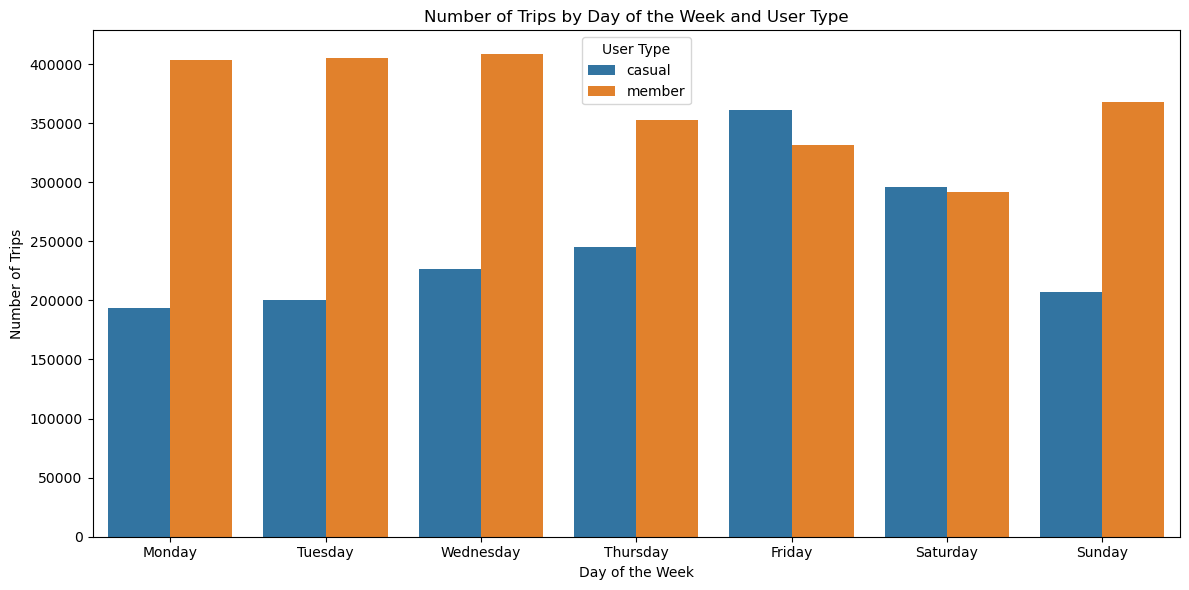

In [51]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
#groupby
trip_count_by_week = combined_df.groupby(['ride_day', 'user_type']).size().reset_index(name='trip_count')


plt.figure(figsize=(12, 6))
sns.barplot(data=trip_count_by_week, x='ride_day', y='trip_count', hue='user_type', order=day_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Day of the Week and User Type')


plt.legend(title='User Type')
plt.tight_layout()
plt.show()

Annual members have the msot number of trips during Monday to Wednesday, meanwhile we can see an increase of users during Friday and Saturday from our casual member riders. This seems to indicate that our casual riders tend to have more trips in weekends (except on Sunday) than on weekdays. 

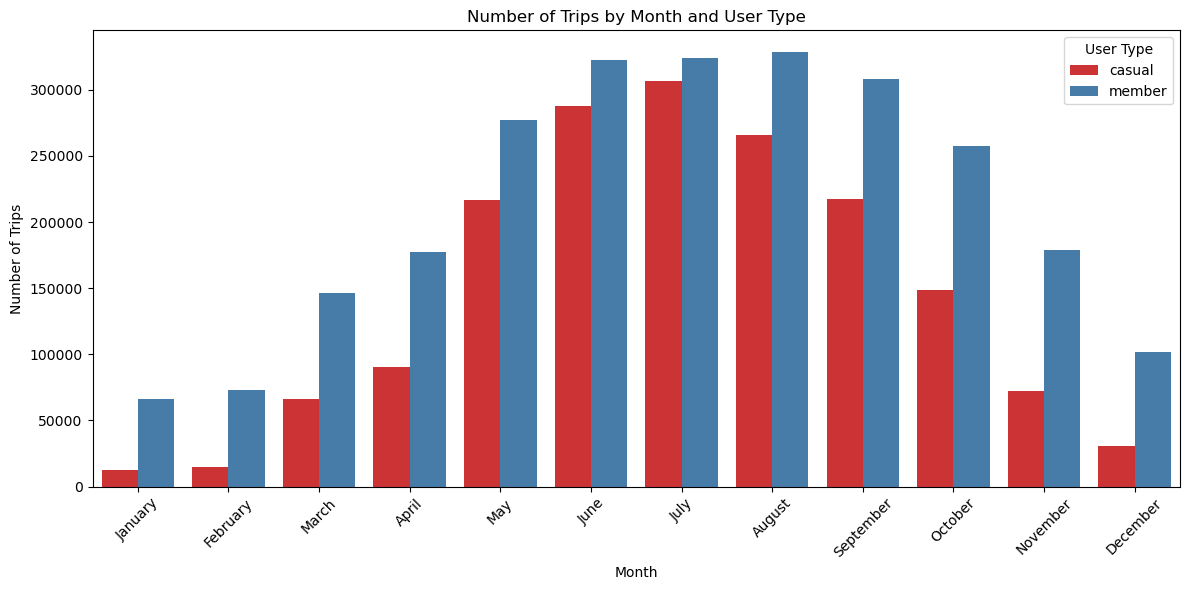

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, x='month_started', hue='user_type', palette='Set1')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Month and User Type')
plt.xticks(rotation=45)

plt.legend(title='User Type')
plt.tight_layout()
plt.show()

An analysis of the number of trips by user type reveals that members consistently utilize our bikes more frequently than casual riders. However, it is noteworthy that casual rider usage experiences a significant surge during the months of May through September. This seasonality indicates a pronounced preference for casual riders to engage in bike usage, suggesting a potential opportunity for targeted marketing or service enhancements during these warmer months to further engage this user segment.

<div style="padding: 10px; color: white; margin: 0; font-size: 200%; text-align: center; display: fill; border-radius: 20px; background-color: #4285F4; overflow: hidden; font-weight: 800">5 | Conclusions🔍</div>


# 5 | Conclusions

Based on our observations, let's answer the following questions:

1. **`How do annual members and casual riders use Cyclistic bikes differently?`**

    Using the trip data collected for 2022, we have observed that there are more annual members than casual members 59.7% of our riders are members and casual riders are about to 40.3%. 

    In terms of the type of bike, the total population prefers using classic bikes. 
    
    In terms of what each type of user prefers, members of Cyclistic Bikeshare prefer classic bikes over electric bikes, the same goes for our casual riders. We presume that this is because of the unavailability of eletric bikes due to being charging. 
    
    We have also noticed that all of our docked_bike users come from casual members only. This can be a good opportunity as well to inform them about the benefits of non docked bikes for their flexibility of being left anywhere, anytime. Another observation regarding docked bikes is that they are the most heavily used bike for great distances by our casual members. Meanwhile the members mostly use the bikes for short distances. 

    In terms of how they difer on number of trips per day, most casual riders take trips on the weekends, while annual members use their bike everyday. Meanwhile, if we observe the number of trips per month by each user type, we can see that members consistently utilize our bikes more frequently than casual riders. The only increase of casual riders usage of the Bikes are through May and September. These months belongs to Spring and Summer, and offer favorable outdoor activities, such as biking. 

2. **`Why would casual riders buy Cyclistic annual memberships?`**

    Our data analysis shows us a number of reasons for converting our casual riders into annual members:

    - **Increased Accessibility** 
    
         Casual members may find value in transitioning to annual memberships due to the enhanced flexibility it offers, particularly for regular users. The convenience of unrestricted drop-off locations, as opposed to designated stations, aligns with observed preferences, as indicated by the lower popularity of docked bikes among the total population. Additionally, annual memberships grant access to a wider range of bike types, including electric and classic bikes.
    
    - **Cost Savings**

         Transitioning to an annual membership offers casual riders substantial cost savings, particularly beneficial for frequent users of the Cyclistic BikeShare service. Annual memberships also provide predictability in expenses, aiding in transportation budgeting and avoiding unexpected fees. This convenience is especially valuable for casual riders who rely on bikes for daily local commuting, seamlessly integrating biking into their routines.

    - **Convenience on Longer Routes**

        Based on our analysis, casual riders tend to favor docked bikes for longer trips. To enhance their experience, Cyclistic BikeSharing can offer both docked and electric bikes within an annual membership at a cost-effective rate, providing added convenience for frequent riders with longer routes.         

3. **`How can Cyclistic use digital media to influence casual riders to become members?`**

      Our analysis further unveiled a notable increase in casual rider usage during the months of May and September, as well as during the days leading up to the weekend (Friday and Saturday). Our data also suggests that daily bike users within the casual rider category represent a strategic target audience for our annual membership marketing efforts. In addition, we can also utilize the most popular stations for our marketing campaign.

     In response to these findings, Cyclistic can design a targeted marketing campaign that showcases the advantages of our annual memberships for frequent casual riders. Cyclistic can leverage on the surge in casual rider activity during the weekends, the peak season from May to September (Spring to Summer), and the most popular stations that our data revealed. This campaign aims to maximize its impact during the period of heightened user engagement.









    

--- 
Thank you for taking the time to explore this notebook! I hope you found the insights and analysis useful. If you have any questions or feedback, please feel free to reach out. :)